<a href="https://colab.research.google.com/github/zhafar3adib/belajar_datascience/blob/master/Machine_Learning_Classification2%2BRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#Classification

##Read Dataset

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/zhafar3adib/belajar_datascience/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Cleansing Data

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
data['TotalCharges'] = data['TotalCharges'].replace([' '],'0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [50]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
data.drop(['customerID'],axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


##Exploratory Data Analysis

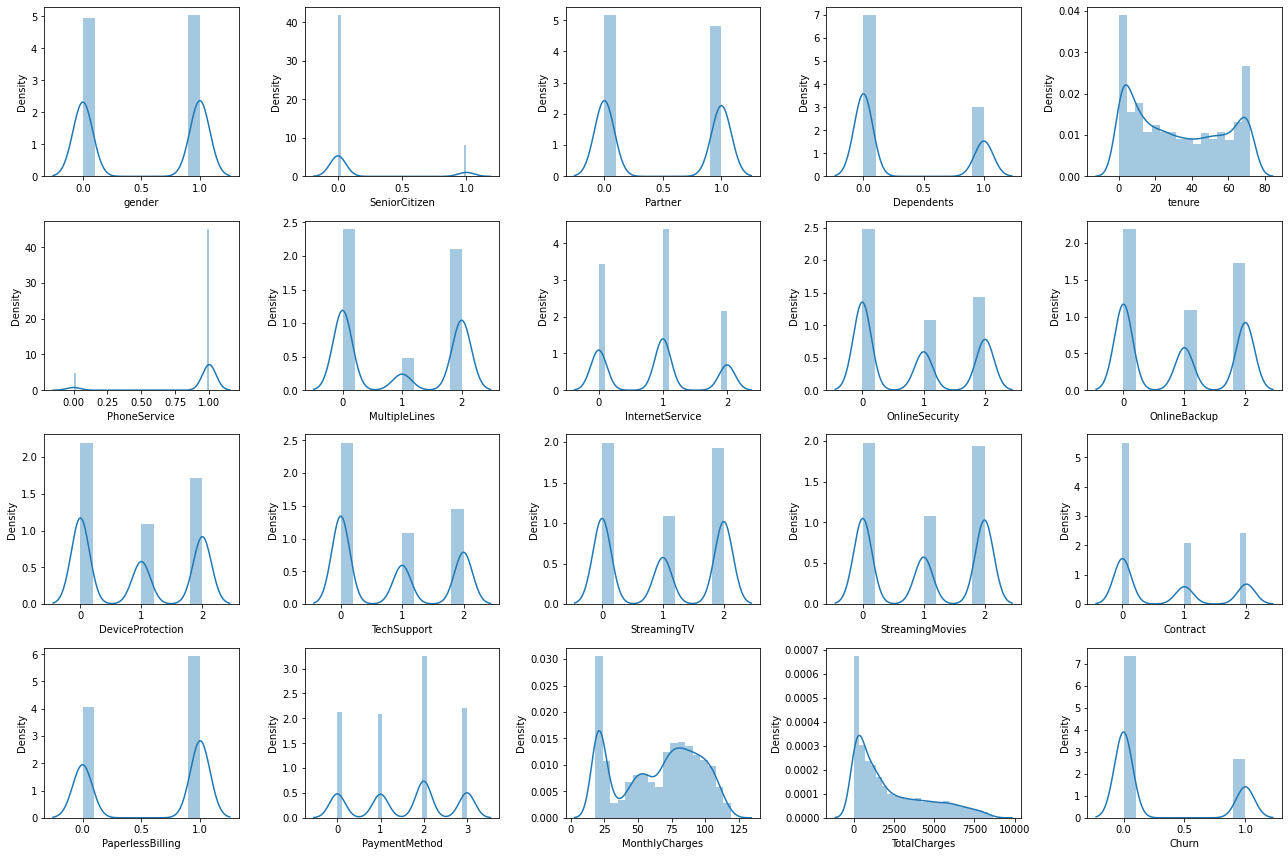

In [52]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
           'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
           'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

fig, axes = plt.subplots(4,5, figsize=(18,12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(columns):
  plot = sns.distplot(data[col], ax=axes[i])

plt.tight_layout()

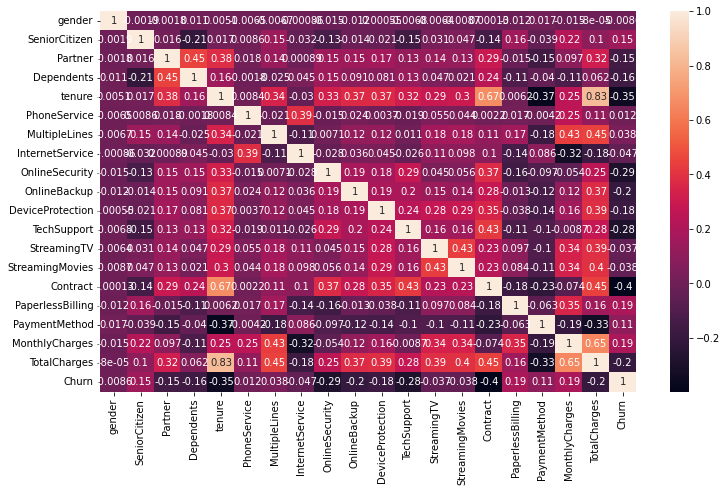

In [53]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

0    5174
1    1869
Name: Churn, dtype: int64

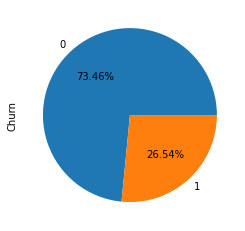

In [54]:
data['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')
data['Churn'].value_counts()

##Modeling and Evaluation

###Set the Function

In [55]:
def confusion(y_true, preds):
  """
  y_true - the y values that are actually true in the dataset (numpy array or pandas series)
  preds - the predictions for those values from some model (numpy array or pandas series)
  """

  tp, fp, fn, tn = confusion_matrix(y_true, preds).ravel()
  print(confusion_matrix(y_true, preds))
  print('')
  print(model)
  print("True Positive: ", format(tp))
  print("False Positive: ", format(fp))
  print("True Negative: ", format(tn))
  print("False Negative: ", format(fn))
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
  plt.show()
  print(classification_report(y_true, preds))
  print('Accuracy score ' + str(model) + ': ', format(round(accuracy_score(y_true, preds),4)))
  print('Precision score ' + str(model) + ': ', format(round(precision_score(y_true, preds,average='macro'),4)))
  print('Recall score ' + str(model) + ': ', format(round(recall_score(y_true, preds,average='macro'),4)))
  print('F1 score ' + str(model) + ': ', format(round(f1_score(y_true, preds,average='macro'),4)))

In [56]:
def roc_curve_plot(y_test, y_preds):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

###Random Forest Classification

In [57]:
X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [58]:
# Simple machine learning model
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

[[1410  140]
 [ 297  266]]

RandomForestClassifier()
True Positive:  1410
False Positive:  140
True Negative:  266
False Negative:  297


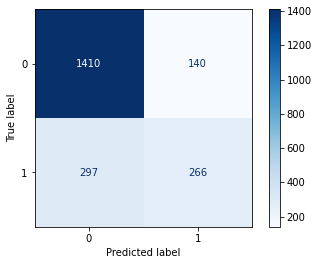

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1550
           1       0.66      0.47      0.55       563

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Accuracy score RandomForestClassifier():  0.7932
Precision score RandomForestClassifier():  0.7406
Recall score RandomForestClassifier():  0.6911
F1 score RandomForestClassifier():  0.7074


In [59]:
confusion(y_test, y_pred)

###ROC Curve

In [60]:
y_prob = model.predict_proba(X_test)

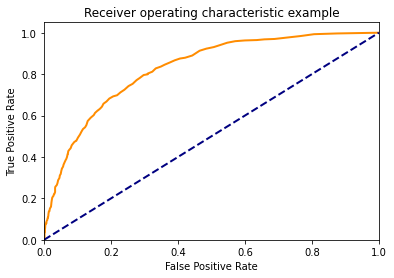

0.6910731679367443

In [61]:
roc_curve_plot(y_test, y_prob)

#Regression

##Read Dataset

In [62]:
reg = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv')
reg.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Cleansing Data

In [63]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [64]:
reg.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [65]:
reg.drop(['id','date'],axis=1, inplace=True)
reg.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Exploratory Data Analysis

In [66]:
reg.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

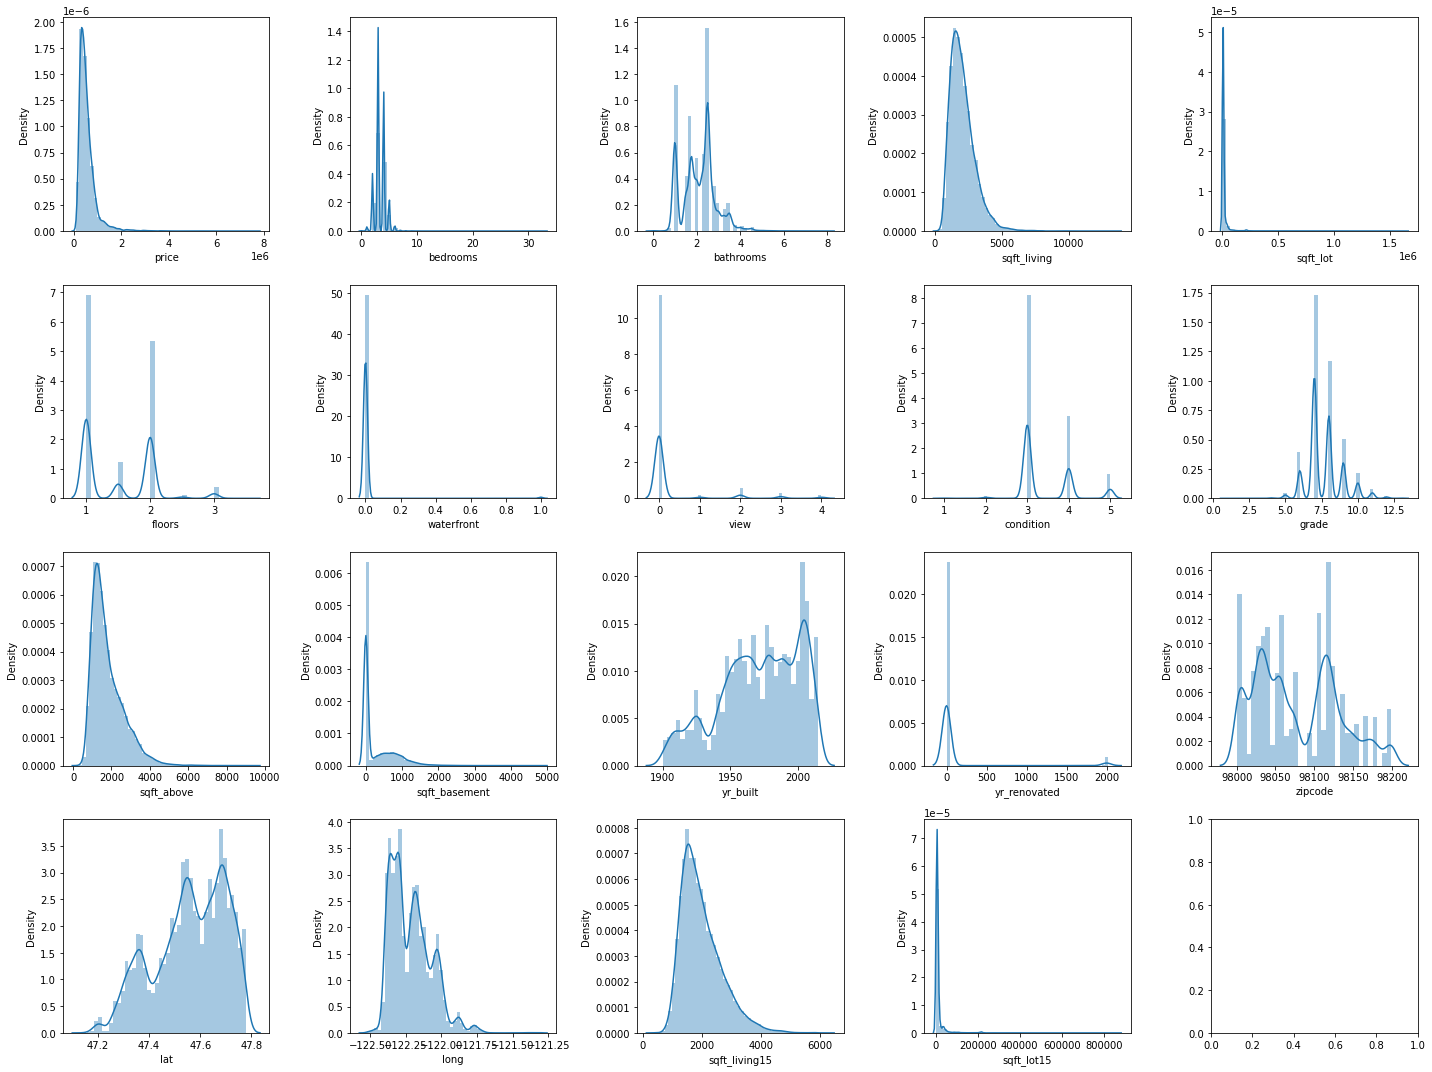

In [67]:
reg_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

fig, axes = plt.subplots(4,5, figsize=(20,15))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(reg_columns):
  plot = sns.distplot(reg[col], ax=axes[i])

plt.tight_layout()

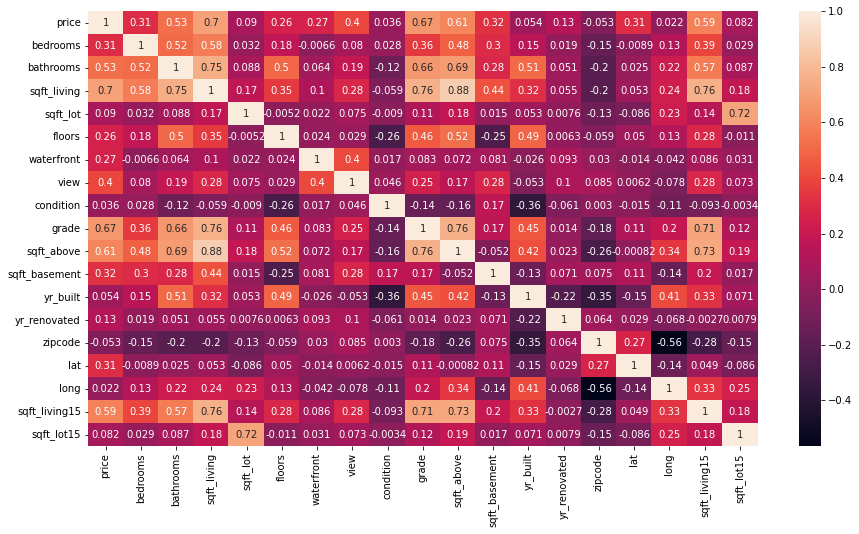

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(reg.corr(), annot=True)
plt.show()

##Modeling and Evaluation

###Set the Function

In [69]:
def print_metrics(y_true, preds, model_name):
  print('Model: '+ str(model_name))
  print('Mean Squared Error: ', format(round(mean_squared_error(y_true, preds),3)))
  print('Mean Absolute Error: ', format(round(mean_absolute_error(y_true, preds),3)))
  print('R2 Score: ', format(round(r2_score(y_true, preds),3)))

###Set Regression Model

In [70]:
X = reg.drop(columns='price')
y = reg['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [71]:
tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()
ada_mod = AdaBoostRegressor()
reg_mod = LinearRegression()
La = Lasso(alpha=0.5)
ri = Ridge(alpha=0.9)

In [28]:
tree_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
reg_mod.fit(X_train, y_train)
La.fit(X_train, y_train)
ri.fit(X_train, y_train)

Ridge(alpha=0.9)

In [29]:
preds_tree = tree_mod.predict(X_test) 
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_reg = reg_mod.predict(X_test)
preds_lasso = La.predict(X_test)
preds_rigde = ri.predict(X_test)

###Evaluation

In [30]:
print_metrics(y_test,preds_tree,tree_mod)

Model: DecisionTreeRegressor()
Mean Squared Error:  31806627023.53
Mean Absolute Error:  99427.756
R2 Score:  0.759


In [31]:
print_metrics(y_test,preds_rf,rf_mod)

Model: RandomForestRegressor()
Mean Squared Error:  17811127368.768
Mean Absolute Error:  71086.178
R2 Score:  0.865


In [32]:
print_metrics(y_test,preds_ada,ada_mod)

Model: AdaBoostRegressor()
Mean Squared Error:  100828752087.731
Mean Absolute Error:  280206.678
R2 Score:  0.237


In [33]:
print_metrics(y_test,preds_reg,reg_mod)

Model: LinearRegression()
Mean Squared Error:  41139338695.794
Mean Absolute Error:  127811.961
R2 Score:  0.689


In [34]:
print_metrics(y_test,preds_lasso,La)

Model: Lasso(alpha=0.5)
Mean Squared Error:  41139504280.32
Mean Absolute Error:  127811.376
R2 Score:  0.689


In [35]:
print_metrics(y_test,preds_rigde,ri)

Model: Ridge(alpha=0.9)
Mean Squared Error:  41148973041.904
Mean Absolute Error:  127784.079
R2 Score:  0.689


#Hyperparameter Tuning for Classification

##Cross Validation

In [36]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
ex_kf = KFold(n_splits=10, shuffle=True).split(range(25))

# show the training and testing set
print('{} {:^61} {}'.format("Iteration","Training set observation","Testing set observation"))

for i, k in enumerate(ex_kf, start=1):
  print("{:^9} {} {:^25}".format(i, k[0], str(k[1])))

Iteration                   Training set observation                    Testing set observation
    1     [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 17 18 19 20 21 22 23 24]        [ 8 15 16]        
    2     [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24]        [ 1  2 18]        
    3     [ 0  1  2  3  4  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24]        [ 5  6 12]        
    4     [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 24]        [ 7 17 23]        
    5     [ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24]        [ 0  4 22]        
    6     [ 0  1  2  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]           [3 9]          
    7     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23]          [19 24]         
    8     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 16 17 18 19 20 21 22 23 24]          [13 14]         
    9     [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 1

In [38]:
X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [39]:
model = RandomForestClassifier()

In [40]:
scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(scores)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.82726137 0.84009869 0.8355202  0.83892245 0.82428966 0.79230753
 0.81666132 0.80901747 0.82398453 0.83411599]

Average of accuracy using CV 10 fold (0.82422) and the standard deviation (0.01418)


##Grid Search CV

In [41]:
model = RandomForestClassifier()

param_dist = {"max_depth": [3, None],
              "min_samples_split": list(range(2, 7)),
              "min_samples_leaf": list(range(1, 5)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=3)

[[1419  131]
 [ 290  273]]

RandomForestClassifier(criterion='entropy', min_samples_leaf=4)
True Positive:  1419
False Positive:  131
True Negative:  273
False Negative:  290


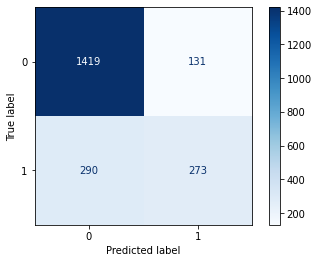

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1550
           1       0.68      0.48      0.56       563

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy score RandomForestClassifier(criterion='entropy', min_samples_leaf=4):  0.8008
Precision score RandomForestClassifier(criterion='entropy', min_samples_leaf=4):  0.753
Recall score RandomForestClassifier(criterion='entropy', min_samples_leaf=4):  0.7002
F1 score RandomForestClassifier(criterion='entropy', min_samples_leaf=4):  0.7177


In [42]:
model = RandomForestClassifier(criterion='entropy', min_samples_leaf=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion(y_test, y_pred)

In [43]:
rf_prob = model.predict_proba(X_test)

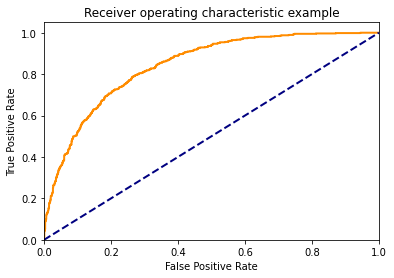

0.7001930900131783

In [44]:
roc_curve_plot(y_test, rf_prob)